Populating the interactive namespace from numpy and matplotlib
wirte 2-d initial vector and each components must be spaced
0 3
the optimal argument of Y is : [ 1.88389765  0.94144882]
and optimal value is : 0.0002


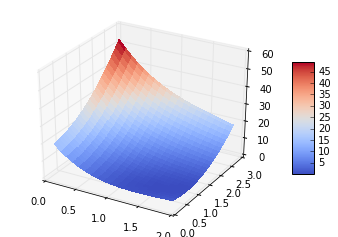

In [1]:
#newton's method for Y = (X1-2)**4 +(X1-2*X2)**2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
%pylab inline

cnt = 0;
X = [[0,0]]

#get initial value 
while True:
    if cnt == 0:
        print("wirte 2-d initial vector and each components must be spaced")
    else:
        print("please try again")
    cnt += 1
    X[0] = [float(x) for x in input().split()]
    if len(X[0]) == 2:
        break;

def Make_Plot():
    X1,X2 = np.transpose(X)
    X1 = np.arange(min(X1), max(X1), 0.01)
    X2 = np.arange(min(X2), max(X2), 0.01)
    X1, X2 = np.meshgrid(X1, X2)
    Y = (X1-2)**4 +(X1-2*X2)**2
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

def Make_Coordinate(X):
    X1 = np.arange(X[0], X[0]+0.1, 0.001)
    X2 = np.arange(X[1], X[1]+0.1, 0.001)
    X1, X2 = np.meshgrid(X1, X2)
    Y = (X1-2)**4 +(X1-2*X2)**2
    return Y
            
def Make_Gradient(Y):
    grad_X1 = np.gradient(np.array(Y, dtype=float), 0.001, axis=1)
    grad_X2 = np.gradient(np.array(Y, dtype=float), 0.001, axis=0)
    grad = [grad_X1[1][1],grad_X2[1][1]]
    return grad_X1, grad_X2, grad

def Make_Hessian(g1,g2):
    hessian_X11 = np.gradient(np.array(g1, dtype=float), 0.001, axis=1)
    hessian_X12 = np.gradient(np.array(g1, dtype=float), 0.001, axis=0)
    hessian_X21 = np.gradient(np.array(g2, dtype=float), 0.001, axis=1)
    hessian_X22 = np.gradient(np.array(g2, dtype=float), 0.001, axis=0)
    hessian = [[hessian_X11[2][2],hessian_X12[2][2]],
          [hessian_X21[2][2],hessian_X22[2][2]]]
    return hessian
              
def Calculate_Criteria(Y):
    grad_X1 = np.gradient(np.array(Y, dtype=float), 0.001, axis=1)
    grad_X2 = np.gradient(np.array(Y, dtype=float), 0.001, axis=0)
    grad = [grad_X1[1][1],grad_X2[1][1]]          
    stop_criteria = np.linalg.norm(grad,ord=2)
    return stop_criteria

def Step_Size():
    return -1

def Direction(Y):
    g1,g2,grad = Make_Gradient(Y)
    F = Make_Hessian(g1,g2)
    invF = np.linalg.inv(F)
    direction = np.matmul(invF,grad)
    return direction
                            
Y = Make_Coordinate(X[0])
stop_criteria = Calculate_Criteria(Y)

while stop_criteria > 0.01 :
    X_next = np.add(X[-1],Step_Size()*Direction(Y))
    X.append(X_next)
    Y = Make_Coordinate(X[-1])
    stop_criteria = Calculate_Criteria(Y)
              
print("the optimal argument of Y is :",X[-1])
print("and optimal value is :",round(Make_Coordinate(X[-1])[0][0],4))

Make_Plot()


Populating the interactive namespace from numpy and matplotlib
wirte 2-d initial vector and each components must be spaced
0 3
1 iteration start
1 in  1 iteration start and the X00 is  [0.0, 3.0]
1 in  2 iteration start and the X01 is  [ 2.70655743  1.52190569]
2 iteration start
2 in  1 iteration start and the X10 is  [ 2.55308014  1.21910728]
2 in  2 iteration start and the X11 is  [ 2.45023892  1.27068475]
3 iteration start
3 in  1 iteration start and the X20 is  [ 2.26567715  1.1081918 ]
3 in  2 iteration start and the X21 is  [ 2.24757432  1.12847026]
4 iteration start
4 in  1 iteration start and the X30 is  [ 2.0950905   1.04145841]
4 in  2 iteration start and the X31 is  [ 2.09227662  1.04631485]
5 iteration start
the optimal argument of Y is : [ 2.08473527  1.04093871]
and optimal value is : 0.0001


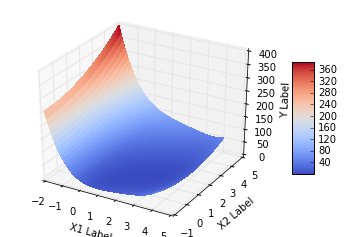

In [2]:
#quasi-newton's method (DFP) for Y = (X1-2)**4 +(X1-2*X2)**2 (2-dimension variables)
import numpy as np
from scipy.optimize import minimize_scalar
import sys
import matplotlib.pyplot as plt 
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d, Axes3D 
%pylab inline

cnt = 0; 
X = [[0,0]] 
H = []
P = []
Q = []
G = []
H.append(np.identity(2)) 
thershold = 0.01

#get initial value 
while True: 
    if cnt == 0: 
        print("wirte 2-d initial vector and each components must be spaced") 
    else: 
        print("please try again") 
    cnt += 1 
    X[0] = [float(x) for x in input().split()] 
    if len(X[0]) == 2: 
        break
        
initial = X[0]

def Make_Plot():
    X.append(initial)
    X1,X2 = np.transpose(X)
    X1 = np.arange(min(X1)-2, max(X1)+2, 0.01)
    X2 = np.arange(min(X2)-2, max(X2)+2, 0.01)
    X1, X2 = np.meshgrid(X1, X2)
    Y = (X1-2)**4 +(X1-2*X2)**2
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    ax.set_xlabel('X1 Label')
    ax.set_ylabel('X2 Label')
    ax.set_zlabel('Y Label')
    
    plt.show()

def Make_Coordinate(X): 
    X1 = np.arange(X[0], X[0]+0.1, 0.001) 
    X2 = np.arange(X[1], X[1]+0.1, 0.001) 
    X1, X2 = np.meshgrid(X1, X2) 
    Y = (X1-2)**4 +(X1-2*X2)**2 
    return Y

def Calculate_Criteria(Y):
    grad_X1 = np.gradient(np.array(Y, dtype=float), 0.001, axis=1)
    grad_X2 = np.gradient(np.array(Y, dtype=float), 0.001, axis=0)
    grad = [grad_X1[1][1],grad_X2[1][1]]          
    stop_criteria = np.linalg.norm(grad,ord=2)
    return stop_criteria

def Make_Gradient(Y):
    grad_X1 = np.gradient(np.array(Y, dtype=float), 0.001, axis=1)
    grad_X2 = np.gradient(np.array(Y, dtype=float), 0.001, axis=0)
    grad = [grad_X1[1][1],grad_X2[1][1]]
    return grad_X1, grad_X2, grad

def Step_Size(X,D): 
    def Y(alp,x,d) : 
        return ((x[0]+alp*d[0])-2)**4 +((x[0]+alp*d[0])-2*(x[1]+alp*d[1]))**2 
    x = X 
    d = D
    max = sys.maxsize
    alp_k = minimize_scalar(lambda alp: Y(alp, x, d), bounds=(0,max), method='bounded') 
    return round(alp_k.x,6)

def Direction(Y): 
    g1,g2,grad = Make_Gradient(Y) 
    direction = np.matmul(-1*H[-1],grad) 
    return direction


count = 0
in_count = 0
while True : 
    if len(X) > 1:
        break
    count += 1
    print(count,"iteration start")
    Y = Make_Coordinate(X[0])
    _,_,grad = Make_Gradient(Y)
    G.append(grad)
    stop_criteria = Calculate_Criteria(Y) 
    if stop_criteria < 0.01: 
        break 
    while True: 
        in_count += 1
        print(count, "in ",in_count,"iteration start and the X{count}{in_count} is ".format(count = count-1,in_count=in_count-1 ),X[-1])
        direction = Direction(Y) 
        step_size = Step_Size(X[-1],direction) 
        X_next = np.add(X[-1], step_size*direction)
        X.append(X_next)
        Y = Make_Coordinate(X[-1])
        _,_,grad_next = Make_Gradient(Y)
        G.append(grad_next)
        if stop_criteria < 0.01 :
            break
        if len(X) > 2:
            X = []
            X.append(X_next)
            H = []
            H.append(np.identity(2))
            P = []
            Q = []
            G = []
            in_count = 0
            break
        P.append(step_size*direction)
        Q.append(np.subtract(G[-1],G[-2]))
        p_t = np.reshape(P[-1],(2,1))
        hc1 = np.matmul(p_t,[P[-1]])
        a1 = np.matmul(Q[-1],p_t)
        hq = np.matmul(H[-1],Q[-1])
        hq_t = np.reshape(hq,(2,1))
        hc2 = np.matmul(hq_t,[hq])
        q_t = np.reshape(Q[-1],(2,1))
        a2 = np.matmul([hq],q_t)
        H_com = np.subtract(hc1/a1, hc2/a2)
        H.append(np.add(H[-1],H_com))
        
print("the optimal argument of Y is :",X[-1])
print("and optimal value is :",round(Make_Coordinate(X[-1])[0][0],4))
        
Make_Plot()            



In [ ]:
#quasi-newton's method (DFP) 
#for Y = (pi*d1*(d1**2+h**2)**(1/2)+pi*d1**2) - (pi*10*(d2**2+h**2)**(1/2)) + pi*d2**2 (3-dimension variables)
import numpy as np
from scipy.optimize import minimize_scalar
import sys
import matplotlib.pyplot as plt 
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d, Axes3D 
%pylab inline

pi = np.pi
cnt = 0; 
X = [[0,0,0]] 
H = []
P = []
Q = []
G = []
H.append(np.identity(3)) 
thershold = 0.01

#get initial value 
while True: 
    if cnt == 0: 
        print("wirte 3-d initial vector and each components [d1,d2,h] must be spaced") 
    else: 
        print("please try again") 
    cnt += 1 
    X[0] = [float(x) for x in input().split()] 
    if len(X[0]) == 3: 
        break
        
def Make_Coordinate(X): 
    d1 = np.arange(X[0], X[0]+0.1, 0.001) 
    d2 = np.arange(X[1], X[1]+0.1, 0.001)
    h = np.arange(X[2], X[2]+0.1, 0.001)
    d1, d2, h = np.meshgrid(d1, d2, h) 
    Y = (pi*d1*(d1**2+h**2)**(1/2)+pi*d1**2) - (pi*10*(d2**2+h**2)**(1/2)) + pi*d2**2
    return Y

def Calculate_Criteria(Y):
    grad_X1 = np.gradient(np.array(Y, dtype=float), 0.001, axis=1)
    grad_X2 = np.gradient(np.array(Y, dtype=float), 0.001, axis=0)
    grad_X3 = np.gradient(np.array(Y, dtype=float), 0.001, axis=2)
    grad = [grad_X1[1][1][1],grad_X2[1][1][1],grad_X3[1][1][1]]          
    stop_criteria = np.linalg.norm(grad,ord=2)
    return stop_criteria

def Make_Gradient(Y):
    grad_X1 = np.gradient(np.array(Y, dtype=float), 0.001, axis=1)
    grad_X2 = np.gradient(np.array(Y, dtype=float), 0.001, axis=0)
    grad_X3 = np.gradient(np.array(Y, dtype=float), 0.001, axis=2)
    grad = [grad_X1[1][1][1],grad_X2[1][1][1],grad_X3[1][1][1]]
    return grad_X1, grad_X2, grad_X3, grad

def Step_Size(X,D): 
    def Y(alp,x,d) :
        return (pi*(x[0]+alp*d[0])*((x[0]+alp*d[0])**2+(x[2]+alp*d[2])**2)**(1/2)+pi*(x[0]+alp*d[0])**2) - (pi*10*((x[1]+alp*d[1])**2+(x[2]+alp*d[2])**2)**(1/2)) + pi*(x[1]+alp*d[1])**2
    x = X 
    d = D
    max = sys.maxsize
    alp_k = minimize_scalar(lambda alp: Y(alp, x, d), bounds=(0,100), method='bounded') 
    return round(alp_k.x,6)

def Direction(Y): 
    _,_,_,grad = Make_Gradient(Y) 
    direction = np.matmul(-1*H[-1],grad) 
    return direction


count = 0
in_count = 0
while True : 
    if len(X) > 1:
        break
    count += 1
    print(count,"iteration start")
    Y = Make_Coordinate(X[0])
    _,_,_,grad = Make_Gradient(Y)
    G.append(grad)
    stop_criteria = Calculate_Criteria(Y) 
    if stop_criteria < 0.1: 
        break 
    while True: 
        in_count += 1
        print(count, "in ",in_count,"iteration start and the X{count}{in_count} is ".format(count = count-1,in_count=in_count-1 ),X[-1])
        direction = Direction(Y)
        step_size = Step_Size(X[-1],direction)
        X_next = np.add(X[-1], step_size*direction)
        X.append(X_next)
        Y = Make_Coordinate(X[-1])
        _,_,_,grad_next = Make_Gradient(Y)
        G.append(grad_next)
        if stop_criteria < 0.1 :
            break
        if len(X) > 3:
            X = []
            X.append(X_next)
            H = []
            H.append(np.identity(3))
            P = []
            Q = []
            G = []
            in_count = 0
            break
        P.append(step_size*direction)
        Q.append(np.subtract(G[-1],G[-2]))
        p_t = np.reshape(P[-1],(3,1))
        hc1 = np.matmul(p_t,[P[-1]])
        a1 = np.matmul(Q[-1],p_t)
        hq = np.matmul(H[-1],Q[-1])
        hq_t = np.reshape(hq,(3,1))
        hc2 = np.matmul(hq_t,[hq])
        q_t = np.reshape(Q[-1],(3,1))
        a2 = np.matmul([hq],q_t)
        H_com = np.subtract(hc1/a1, hc2/a2)
        H.append(np.add(H[-1],H_com))
        
print("the optimal argument of Y is :",X[-1])
print("and optimal value is :",round(Make_Coordinate(X[-1])[0][0][0],4))


Populating the interactive namespace from numpy and matplotlib
wirte 3-d initial vector and each components [d1,d2,h] must be spaced


In [76]:
#simplex method for MIN -(2500x1+2150x2+2300x3+1200x4)

import numpy as np

#Object function MIN -(2500x1+2150x2+2300x3+1200x4)

#Constraint
#270x1+230x2+250x3+120x4 <= 10000
#15x1+23x2+20x3+7x4 <= 1500
#120x1+110x2+100x3+80x4 <= 5000
#15x1+5x2+9x3+3x4 <= 1000

c = [-2500,-2150,-2300,-1200]

A = [[270,230,250,4,1,0,0,0]
    ,[15,23,20,7,0,1,0,0]
    ,[120,110,100,80,0,0,1,0]
    ,[15,5,9,3,0,0,0,1]]

b = [10000,1500,5000,1000]

#make canonical form
C_table = []
C_table.extend(A)
C_table[0].append(b[0])
C_table[1].append(b[1])
C_table[2].append(b[2])
C_table[3].append(b[3])
c.extend([0,0,0,0,0])
C_table.append(c)
n_row = len(C_table)
n_col = len(C_table[0])

cnt = 0;

while True:
    cnt += 1
    #print(canonical tableau)
    print(cnt,"iteration canonical tableau is look as below")
    for i in range(n_row):
        print(C_table[i])
    print()
    
    #make r array
    r = C_table[-1][:-1]

    #stop criteria
    if min(r) >= 0 :
        break

    #find enter column
    q = r.index(min(r))

    #make q column array & b column array
    y_q = []
    y_0 = []
    for i in range(n_row-1) :
        y_q.append(C_table[i][q])
        y_0.append(C_table[i][-1])

    #check problem is unbouned or not
    if max(y_q) <= 0 :
        print("this problem is unbouned")
        break

    #find row element pivot 
    p_t = []
    for i in range(n_row-1):
        if y_q[i] > 0:
            p_t.append( round(y_0[i]/y_q[i], 3))
    p = p_t.index(min(p_t))

    C_table[p] = [round(item/C_table[p][q],4) for item in C_table[p]]

    for i in range(n_row):
        if i == p:
            continue
        y_iq = -1*C_table[i][q]
        C_table[i] = [ round(C_table[i][j]+(C_table[p][j]*y_iq),4) for j in range(n_col)]

X = []
for i in range(n_col-1):
    X.append(0)
for i in range(n_row-1):
    for j in range(n_col-1):
        if C_table[i][j] == 1:
            X[j] = C_table[i][-1]
    
print("the optimal argument is",X)
print("the optimal value is",C_table[n_row-1][n_col-1])



1 iteration canonical tableau is look as below
[270, 230, 250, 4, 1, 0, 0, 0, 10000]
[15, 23, 20, 7, 0, 1, 0, 0, 1500]
[120, 110, 100, 80, 0, 0, 1, 0, 5000]
[15, 5, 9, 3, 0, 0, 0, 1, 1000]
[-2500, -2150, -2300, -1200, 0, 0, 0, 0, 0]

2 iteration canonical tableau is look as below
[1.0, 0.8519, 0.9259, 0.0148, 0.0037, 0.0, 0.0, 0.0, 37.037]
[0.0, 10.2215, 6.1115, 6.778, -0.0555, 1.0, 0.0, 0.0, 944.445]
[0.0, 7.772, -11.108, 78.224, -0.444, 0.0, 1.0, 0.0, 555.56]
[0.0, -7.7785, -4.8885, 2.778, -0.0555, 0.0, 0.0, 1.0, 444.445]
[0.0, -20.25, 14.75, -1163.0, 9.25, 0.0, 0.0, 0.0, 92592.5]

3 iteration canonical tableau is look as below
[1.0, 0.8504, 0.928, 0.0, 0.0038, 0.0, -0.0002, 0.0, 36.9319]
[0.0, 9.5478, 7.074, 0.0, -0.0169, 1.0, -0.0868, 0.0, 896.3063]
[0.0, 0.0994, -0.142, 1.0, -0.0057, 0.0, 0.0128, 0.0, 7.1022]
[0.0, -8.0546, -4.494, 0.0, -0.0397, 0.0, -0.0356, 1.0, 424.7151]
[0.0, 95.3522, -150.396, 0.0, 2.6209, 0.0, 14.8864, 0.0, 100852.3586]

4 iteration canonical tableau is look